In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#Upload insurance dataset
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (3).csv


In [51]:
#Import data and data understanding
raw_data = pd.read_csv('insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
raw_data['sex'] = raw_data['sex'].map({'male': 0, 'female': 1})
raw_data['smoker'] = raw_data['smoker'].map({'no': 0, 'yes': 1})
raw_data = pd.get_dummies(raw_data, columns=['region'], drop_first=True)

In [53]:
X = raw_data.drop('charges', axis=1).values
y = raw_data['charges'].values
print('Size of X: ',X.shape)
print(X)
print(f'Size of y: ',y.shape)
print(y)

Size of X:  (1338, 8)
[[19 1 27.9 ... False False True]
 [18 0 33.77 ... False True False]
 [28 0 33.0 ... False True False]
 ...
 [18 1 36.85 ... False True False]
 [21 1 25.8 ... False False True]
 [61 1 29.07 ... True False False]]
Size of y:  (1338,)
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [54]:
X_norm = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
print(X_norm)
y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
print(y_norm)

[[0.021739130434782608 1.0 0.3212267958030669 ... 0.0 0.0 1.0]
 [0.0 0.0 0.479149852031208 ... 0.0 1.0 0.0]
 [0.21739130434782608 0.0 0.4584342211460855 ... 0.0 1.0 0.0]
 ...
 [0.0 1.0 0.5620123755716976 ... 0.0 1.0 0.0]
 [0.06521739130434782 1.0 0.26472962066182404 ... 0.0 0.0 1.0]
 [0.9347826086956522 1.0 0.35270379338175945 ... 1.0 0.0 0.0]]
[0.25161076 0.00963595 0.05311516 ... 0.00810808 0.01414352 0.44724873]


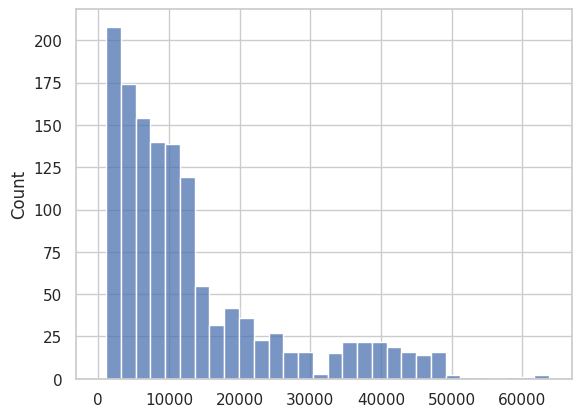

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("whitegrid")

sns.histplot(y)
sns.histplot(y_norm)
plt.show()

In [56]:
X = X.astype(np.float64)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X_std)
y_std = (y - np.mean(y)) / np.std(y)
print(y_std)

[[-1.43876426  1.0105187  -0.45332    ... -0.56641788 -0.61132367
   1.76548098]
 [-1.50996545 -0.98959079  0.5096211  ... -0.56641788  1.63579466
  -0.56641788]
 [-0.79795355 -0.98959079  0.38330685 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [-1.50996545  1.0105187   1.0148781  ... -0.56641788  1.63579466
  -0.56641788]
 [-1.29636188  1.0105187  -0.79781341 ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.55168573  1.0105187  -0.26138796 ...  1.76548098 -0.61132367
  -0.56641788]]
[ 0.2985838  -0.95368917 -0.72867467 ... -0.96159623 -0.93036151
  1.31105347]


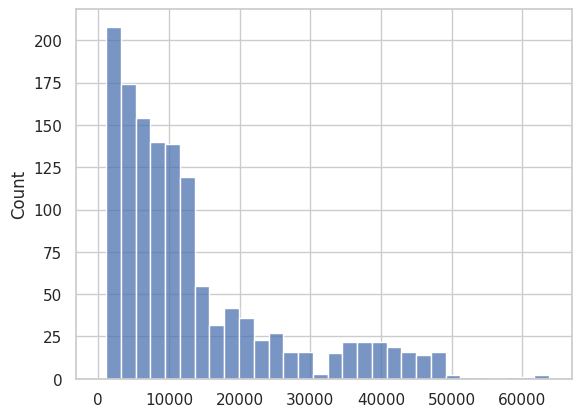

In [57]:
sns.histplot(y)
sns.histplot(y_std)
plt.show()

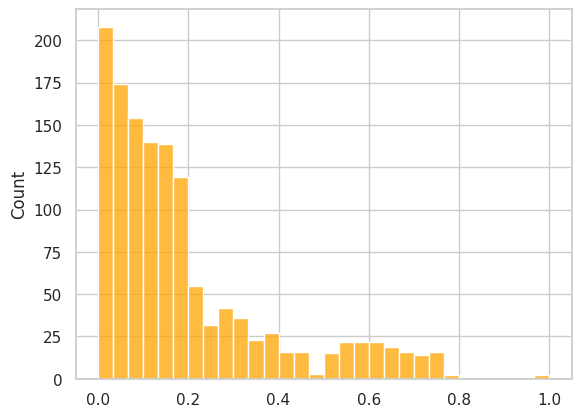

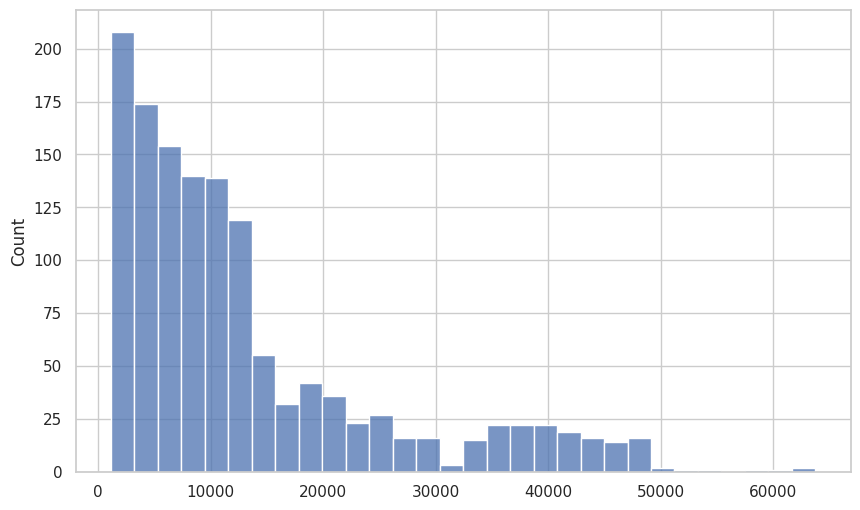

In [65]:
sns.histplot(y_norm, color='orange')
plt.figure(figsize=(10, 6))
sns.histplot(y)
plt.show()

In [66]:
# Create training/test data split
from sklearn.model_selection import train_test_split

X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.3, random_state=1)
print('Size of X_std_train: ',X_std_train.shape)
print('Size of X_std_test: ', X_std_test.shape)
print('Size of y_std_train: ', y_std_train.shape)
print('Size of y_std_test: ', y_std_test.shape)

Size of X_std_train:  (936, 8)
Size of X_std_test:  (402, 8)
Size of y_std_train:  (936,)
Size of y_std_test:  (402,)


In [68]:
# Initialise mlpReg
from sklearn.neural_network import MLPRegressor

mlpReg = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)

In [69]:
# Train the model
mlpReg.fit(X_std_train, y_std_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 100), random_state=20)

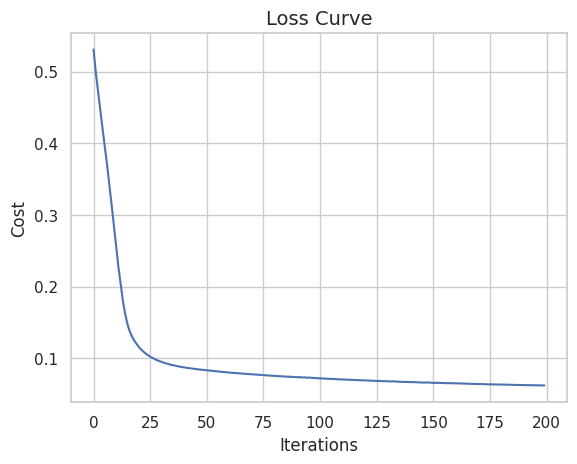

In [70]:
from matplotlib import pyplot as plt
plt.plot(mlpReg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [71]:
# Make prediction on the test set
pred_std = mlpReg.predict(X_std_test)
pred = pred_std * np.std(y) + np.mean(y)
print("Standardised predictions: ", pred_std)
print("Transformed predictions: ", pred)

Standardised predictions:  [-0.70544559 -0.15486931 -0.32860414 -0.1890928  -0.94784678  1.99231373
 -0.10630889 -0.20051127 -0.75529362  0.59857469  0.30977954 -0.16874485
 -0.57627698 -0.45348739 -0.97712975 -0.34724463 -0.55563593 -0.39268715
  0.04102973 -0.06342867 -0.24167294  2.33192281 -0.24613529 -0.2333398
 -0.53103414 -0.43827959 -0.28357906 -0.29871639 -0.62626318 -0.67464887
 -0.04009966 -0.62027495  0.46437183  1.10319218  0.62108093 -0.1335744
  1.89491885  0.15990674 -0.02848141  1.97752305 -0.75295132 -0.08003768
 -0.13768061  0.0296829  -0.63194879  0.01586659 -0.92339497  1.71320353
  0.14272658  0.57511595  0.03516528 -0.02640458 -0.63609924  0.00420838
  0.61164052 -0.70748494  1.7049351  -0.10522082 -0.58670898 -0.87455037
 -0.86705416  0.03812573  0.6503538  -0.76537533  0.0856152  -0.20630005
 -0.12041454  0.09159401 -0.46871855  0.19053814  2.5127111   2.67580213
 -0.78490436 -0.07886928  0.00449997  2.40335319 -0.69991927 -0.67400384
  0.02260854 -0.18082588 -

In [72]:
from sklearn.metrics import mean_squared_error

# Calculate accuracy and error metrics
y_test = y_std_test * np.std(y) + np.mean(y)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))
relative_test_set_rmse = test_set_rmse/np.mean(y_test)*100

# Print R_squared and RMSE value
print('RMSE: ', '{0:.2f}'.format(test_set_rmse))
print('Relative RMSE: ', '{0:.2f}'.format(relative_test_set_rmse), '%')

RMSE:  4817.45
Relative RMSE:  36.34 %
